# Linear Regression

**Overview**
* Linear regression models are a good starting point for regression tasks.
* These models are popular because they can be fit very quickly, and are very interpretable.
* One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions.

### Coding Example 1: Simple Linear Regression

In [1]:
# Importing the basic libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

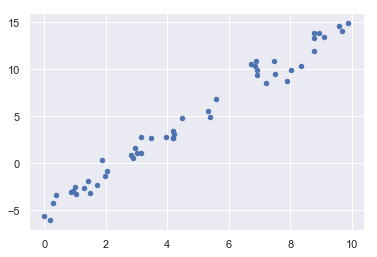

In [3]:
# Creating some random data suitable for linear regression
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y, s=20);

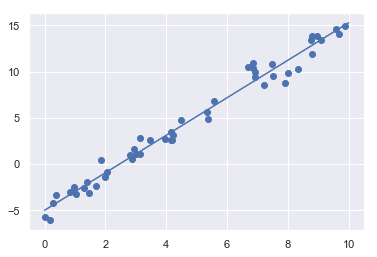

In [9]:
from sklearn.linear_model import LinearRegression # 1. choose model class
model = LinearRegression(fit_intercept=True)      # 2. instantiate model

model.fit(x[:, np.newaxis], y)                    # 3. fit model to data

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])         # 4. predict on new data

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [10]:
# Printing the parameters of the fitted line
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


### Coding Example 2: Polynomial basis functions

In [18]:
# Importing the basic libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [29]:
# Creating a 7 degree polynomial model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

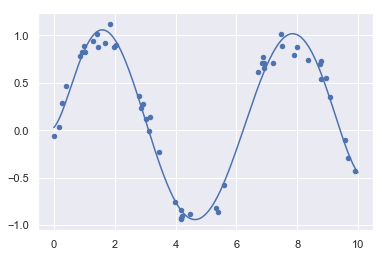

In [30]:
# Creating some random data spread around a sin-curve
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

# Fitting the created data to the 7 degree model
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)

# Using the model to predict the y values
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=20)
plt.plot(xfit, yfit);

The linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data.

## Lasso Regression (L1 regularization)

**Overview**
* The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.
* Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.
* Lasso regression involves penalizing the sum of absolute values (1-norms) of regression coefficients
* It is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.
* Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models.
* The α parameter tunes the strength of the penalty, and should be determined via, for example, cross-validation

In [ ]:
from sklearn.linear_model import Lasso

## Ridge regression (L2 Regularization)

**Overview**
* Most common form of regularization
* Ridge regression penalizes the sum of squares (2-norms) of the model coefficients
* Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.
* α is a free parameter that controls the strength of the penalty
* The α parameter is essentially a knob controlling the complexity of the resulting model. In the limit α→0, we recover the standard linear regression result; in the limit α→∞, all model responses will be suppressed.

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
152 152
linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576849
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123906
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805765856921933


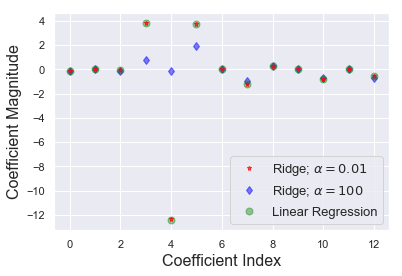

In [64]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
#print(boston_df.info())

# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
#print(boston_df.head(3))

newX=boston_df.drop('Price',axis=1)
print(newX[0:3]) # check 
newY=boston_df['Price']

#print(type(newY))# pandas core frame

X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

Explanation: In X axis we plot the coefficient index and, for Boston data there are 13 features (for Python 0th index refers to 1st feature). For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression. For higher value of α (100), we see that for coefficient indices 3,4,5 the magnitudes are considerably less compared to linear regression case. This is an example of shrinking coefficient magnitude using Ridge regression.